In [ ]:
# https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

In [117]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import scipy
import pandas as pd

from sklearn.manifold import MDS

In [2]:
embeddings_dict = {}

In [29]:
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r',encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [17]:
# finding similar vectors
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [149]:
find_closest_embeddings(
(embeddings_dict['hotel']+embeddings_dict['room']+embeddings_dict['area']+embeddings_dict['time']
+embeddings_dict['location']+embeddings_dict['price']+embeddings_dict['day']+embeddings_dict['budget']
+embeddings_dict['year']+embeddings_dict['night'])/10 )[:5]


# find_closest_embeddings( embeddings_dict['tripadvisor']) 

['.', 'same', 'time', ',', 'but']

In [150]:
find_closest_embeddings(
(embeddings_dict['hotel']+embeddings_dict['room']+embeddings_dict['area']+embeddings_dict['time']
+embeddings_dict['location'])/5 )[:5]

['where', 'same', '.', '__________________________________', 'prohertrib']

In [151]:
def topic_cosine(list1, list2):
    
    topic1_embedding = np.array([0.00]*300) 
    topic2_embedding = np.array([0.00]*300)
    
    for i in list1:
        topic1_embedding += embeddings_dict[i.lower()]
        
    topic1_embedding = topic1_embedding/len(list1)
        
    for i in list2:
        topic2_embedding += embeddings_dict[i.lower()]
    
    topic2_embedding = topic2_embedding/len(list2)
    
    return (1 - spatial.distance.cosine(topic1_embedding, topic2_embedding))
    

In [152]:
insta_topic = {
    'skyline':['skyscraper','block','cloud','daytime','world'],
    'landscape':['nature','flower','natural','landscape','leisure'],
    'events':['rectangle','electric','tickets','brand','circle'],
    'traffic':['vehicle','automotive','infrastructure','lighting','wheel'],
    'people':['gesture','happy','event','yorkers'],
    'city_scapes':['bridge','facade','light','lighting','window']  }

In [164]:
blog_topic = {
    'Quarantine': ['Quarantine', 'travel', 'vaccine', 'rule', 'may', '2021', 'mask'],
    'Accommodation': ['restaurant', 'food', 'hotel', 'great', 'bar','room'],
    'train': ['subway', 'train', 'people', 'station', 'time'],
    'Leisure': ['park', 'walk', 'central', 'time', 'street', 'brooklyn', 'jazz'],
    'Crime': ['crime', 'people', 'homeless', 'like'],
    'air_travel': ['hotel', 'car', 'flight', 'airport', 'jfk','parking']  }

In [165]:
df = pd.DataFrame(columns = insta_topic.keys(), index = blog_topic.keys() ).fillna(0.00)

for i in df.index:
    for j in df.columns.values:
        df.loc[i,j] = topic_cosine(blog_topic[i], insta_topic[j])

In [166]:
df

,skyline,landscape,events,traffic,people,city_scapes
Quarantine,0.318222,0.297941,0.309909,0.248469,0.269528,0.221211
Accommodation,0.400450,0.348191,0.439868,0.333048,0.359699,0.452201
train,0.461352,0.258759,0.411337,0.379573,0.396066,0.439456
Leisure,0.480544,0.409170,0.434882,0.269236,0.420626,0.486892
Crime,0.421768,0.322014,0.250135,0.239437,0.498479,0.251760
air_travel,0.418665,0.173377,0.403170,0.436186,0.262286,0.422816


<AxesSubplot:>

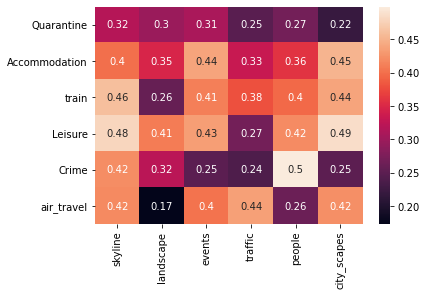

In [167]:
import seaborn as sns

sns.heatmap(df,annot=True)

In [168]:
df.max(axis=1)

Quarantine       0.318222
Accommodation    0.452201
train            0.461352
Leisure          0.486892
Crime            0.498479
air_travel       0.436186
dtype: float64

In [169]:
df2 = pd.DataFrame(index = blog_topic.keys() ).fillna(0.00)



In [170]:
list = []
for i in blog_topic.keys():
    list += blog_topic[i]
    
df2 = pd.DataFrame(index = ['blog'], columns = insta_topic.keys()).fillna(0.00)

for i in df2.columns.values:
    df2[i] = topic_cosine(list, insta_topic[i])
    
df2

,skyline,landscape,events,traffic,people,city_scapes
blog,0.56145,0.40402,0.514427,0.433124,0.485627,0.524011


In [171]:
list = []

for i in insta_topic.keys():
    list += insta_topic[i]
    
df3 = pd.DataFrame(index = ['insta'], columns = blog_topic.keys()).fillna(0.00)

for i in df2.columns.values:
    df3[i] = topic_cosine(list, blog_topic[i])
    
df3

KeyError: 'skyline'